In [2]:
import h5py
import glob
import fitsio
import numpy as np
import os

In [2]:
d = fitsio.read("mdet_data_v6cuts/DES0024-2749_metadetect-v10_mdetcat_part0000.fits")

In [4]:
np.mean(d["mdet_flags"])

0.7612304980873605

In [5]:
import proplot as pplt

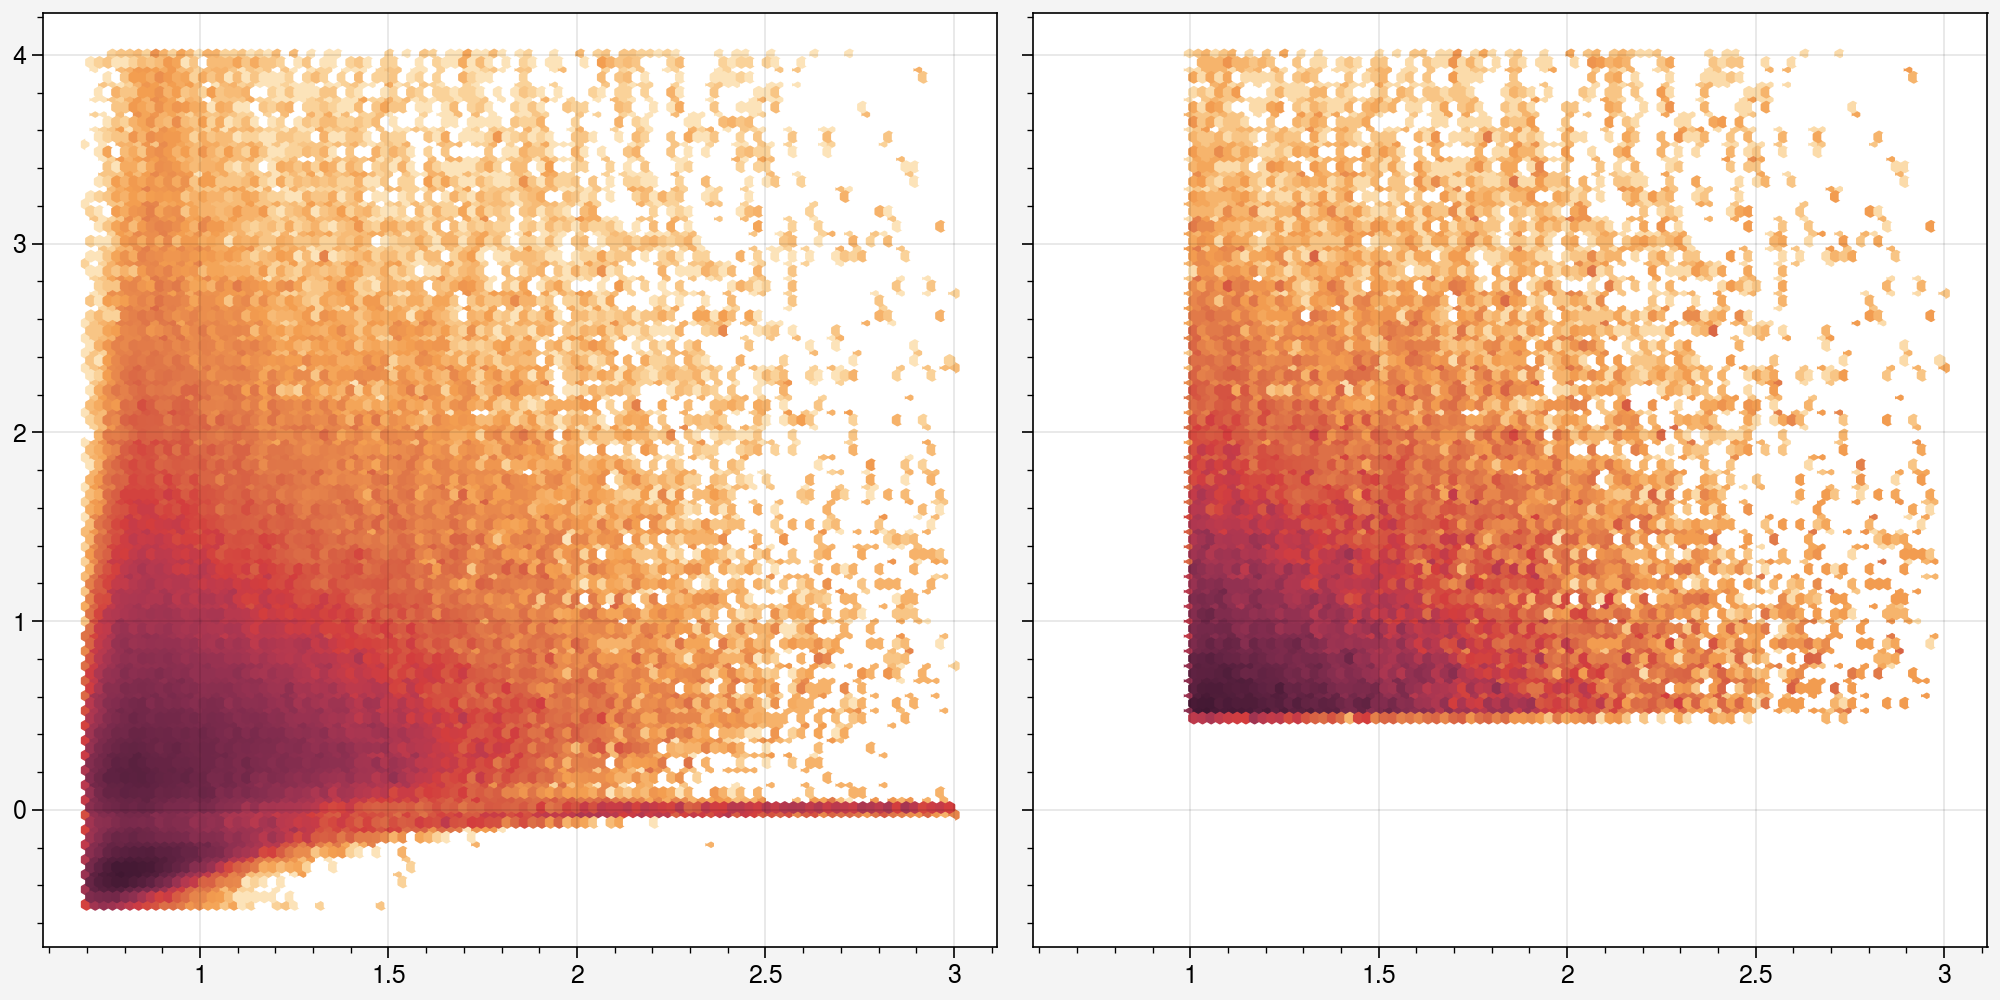

In [23]:
fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].hexbin(
    np.log10(d["gauss_s2n"]),
    d["gauss_T_ratio"],
    extent=(np.log10(5), 3, -0.5, 4),
    norm="log",
)

msk = d["mdet_flags"] == 0
axs[1].hexbin(
    np.log10(d["gauss_s2n"][msk]),
    d["gauss_T_ratio"][msk],
    extent=(np.log10(5), 3, -0.5, 4),
    norm="log",
)
axs[1].xaxis.set_inverted(False)


In [11]:
with h5py.File("metadetect_cutsv6.h5", "r") as fp:
    print(fp["mdet"]["noshear"]["dec"].shape)

with h5py.File("metadetect_cutsv6_blinded.h5", "r") as fp:
    print(fp["mdet"]["noshear"]["dec"].shape)

with h5py.File("metadetect_cutsv6_all.h5", "r") as fp:
    print(fp["mdet"]["noshear"]["dec"].shape)


(151948577,)
(151948577,)


BlockingIOError: [Errno 11] Unable to synchronously open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')